In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data Understanding

In [16]:
movie_data = pd.read_csv('C:/Users/hp/Desktop/movie_data.csv')
movie_data.head(30)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [17]:
assert type(movie_data) == pd.DataFrame

Data Preparation

In [18]:
df = pd.read_csv("C:/Users/hp/Desktop/movie_data.csv", index_col=0)
df.replace("-", np.nan, inplace=True)

In [19]:
relevant_columns = [
    'Title',
    'Genre',
    'Rating',
    'Revenue (Millions)'
]

In [20]:
df = df[relevant_columns]
df

,Title,Genre,Rating,Revenue (Millions)
Rank,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1,333.13
2,Prometheus,"Adventure,Mystery,Sci-Fi",7.0,126.46
3,Split,"Horror,Thriller",7.3,138.12
4,Sing,"Animation,Comedy,Family",7.2,270.32
5,Suicide Squad,"Action,Adventure,Fantasy",6.2,325.02
...,...,...,...,...
996,Secret in Their Eyes,"Crime,Drama,Mystery",6.2,NaN
997,Hostel: Part II,Horror,5.5,17.54
998,Step Up 2: The Streets,"Drama,Music,Romance",6.2,58.01


In [21]:
df = df[df[relevant_columns]["Rating"] >= 8.0]
df

,Title,Genre,Rating,Revenue (Millions)
Rank,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1,333.13
7,La La Land,"Comedy,Drama,Music",8.3,151.06
17,Hacksaw Ridge,"Biography,Drama,History",8.2,67.12
19,Lion,"Biography,Drama",8.1,51.69
20,Arrival,"Drama,Mystery,Sci-Fi",8.0,100.50
...,...,...,...,...
743,El secreto de sus ojos,"Drama,Mystery,Romance",8.2,20.17
766,PK,"Comedy,Drama,Romance",8.2,10.57
773,How to Train Your Dragon,"Animation,Action,Adventure",8.1,217.39


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 1 to 992
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               78 non-null     object 
 1   Genre               78 non-null     object 
 2   Rating              78 non-null     float64
 3   Revenue (Millions)  74 non-null     float64
dtypes: float64(2), object(2)
memory usage: 3.0+ KB


In [25]:
df = df[df['Revenue (Millions)'].notna()]
df

,Title,Genre,Rating,Revenue (Millions)
Rank,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1,333.13
7,La La Land,"Comedy,Drama,Music",8.3,151.06
17,Hacksaw Ridge,"Biography,Drama,History",8.2,67.12
19,Lion,"Biography,Drama",8.1,51.69
20,Arrival,"Drama,Mystery,Sci-Fi",8.0,100.50
...,...,...,...,...
714,Incendies,"Drama,Mystery,War",8.2,6.86
743,El secreto de sus ojos,"Drama,Mystery,Romance",8.2,20.17
766,PK,"Comedy,Drama,Romance",8.2,10.57


In [26]:
df = df[df[relevant_columns]["Revenue (Millions)"] >= 250.00]
df

,Title,Genre,Rating,Revenue (Millions)
Rank,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1,333.13
34,Deadpool,"Action,Adventure,Comedy",8.0,363.02
51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",8.1,936.63
55,The Dark Knight,"Action,Crime,Drama",9.0,533.32
75,Zootopia,"Animation,Adventure,Comedy",8.1,341.26
77,The Avengers,"Action,Sci-Fi",8.1,623.28
81,Inception,"Action,Adventure,Sci-Fi",8.8,292.57
115,Harry Potter and the Deathly Hallows: Part 2,"Adventure,Drama,Fantasy",8.1,380.96
125,The Dark Knight Rises,"Action,Thriller",8.5,448.13


Data Analysis

In [28]:
Genre_counts = df['Genre'].value_counts()

top_Genres = list(Genre_counts.index[:600])
Genre_counts = list(Genre_counts.values[:600])

print("Genre:", top_Genres)
print("Counts:", Genre_counts)

Genre: ['Animation,Adventure,Comedy', 'Action,Adventure,Sci-Fi', 'Action,Adventure,Comedy', 'Action,Adventure,Fantasy', 'Action,Crime,Drama', 'Action,Sci-Fi', 'Adventure,Drama,Fantasy', 'Action,Thriller']
Counts: [4, 3, 1, 1, 1, 1, 1, 1]


Data Visualization

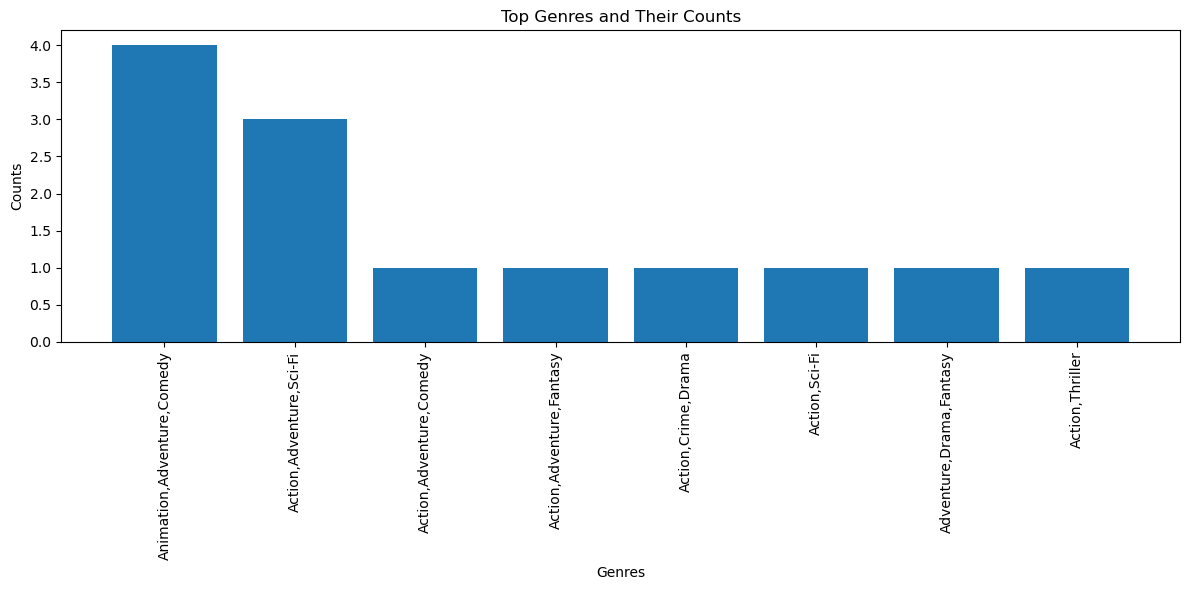

In [30]:
import matplotlib.pyplot as plt


# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar chart
plt.bar(top_Genres, Genre_counts)
plt.xlabel('Genres')
plt.ylabel('Counts')
plt.title('Top Genres and Their Counts')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Ensures labels and ticks fit within the plot area
plt.show()
